A frame with the name 'BPL' is already registered. Overriding


                Time                      Azim    Elev    Distance   Radial Velocity
AOS     2023-06-15T19:59:22.818542 UTC  176.82    0.00    2327.44   -5264.31
        2023-06-15T19:59:22.963664 UTC  176.81    0.01    2326.68   -5263.02
        2023-06-15T19:59:52.963664 UTC  173.02    1.44    2173.10   -4964.20
        2023-06-15T20:00:22.963664 UTC  168.66    2.89    2029.57   -4590.86
        2023-06-15T20:00:52.963664 UTC  163.65    4.31    1898.55   -4127.47
        2023-06-15T20:01:22.963664 UTC  157.92    5.68    1782.97   -3558.97
        2023-06-15T20:01:52.963664 UTC  151.43    6.92    1686.17   -2874.63
        2023-06-15T20:02:22.963664 UTC  144.20    7.94    1611.67   -2073.97
        2023-06-15T20:02:52.963664 UTC  136.36    8.65    1562.74   -1173.23
        2023-06-15T20:03:22.963664 UTC  128.14    8.97    1541.92    -208.51
MAX     2023-06-15T20:03:29.984934 UTC  126.20    8.98    1541.26      21.14
        2023-06-15T20:03:52.963664 UTC  119.85    8.85    1550.36   

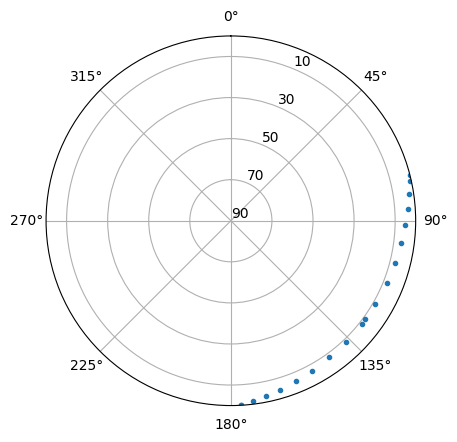

2023-06-15T19:11:23.709663 UTC
BPL


In [2]:

import sys
import numpy as np
import matplotlib.pyplot as plt

from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.config import config


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

# Station definition
station = create_station('BPL', ( 37.8059,144.9514, 0))
azims, elevs = [], []

print("                Time                      Azim    Elev    Distance   Radial Velocity")
print("====================================================================================")

for orb in station.visibility(tle, start=Date.now(), stop=timedelta(hours=24), step=timedelta(seconds=30), events=True):
    elev = np.degrees(orb.phi)
    # Radians are counterclockwise and azimuth is clockwise
    azim = np.degrees(-orb.theta) % 360

    # Archive for plotting
    azims.append(azim)
    # Matplotlib actually force 0 to be at the center of the polar plot,
    # so we trick it by inverting the values
    elevs.append(90 - elev)

    r = orb.r / 1000.
    print("{event:7} {orb.date} {azim:7.2f} {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
        orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
    ))

    if orb.event and orb.event.info.startswith("LOS"):
        # We stop at the end of the first pass
        print()
        break

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.plot(np.radians(azims), elevs, '.')
ax.set_yticks(range(0, 90, 20))
ax.set_yticklabels(map(str, range(90, 0, -20)))
ax.set_rmax(90)

if "no-display" not in sys.argv:
    plt.show()
    print(Date.now())
    print(station)
     

In [68]:
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.propagators.listeners import StationMaskListener,StationSignalListener
import sys
import numpy as np
import matplotlib.pyplot as plt

tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()
azims, elevs = [], []
#print(repr(tle))

station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 


# checkAOS = StationSignalListener(station,0).info(tle)
# print(checkAOS)
# check = StationMaskListener(station=station).check(tle)
# print(check)
 


for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=24), step=timedelta(seconds=30), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    
    print("{event:7}  {orb.date}  {azim:7.2f}  {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
    orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
    ))
    
    if orb.event and orb.event.info.startswith("LOS"):
        # We stop at the end of the first pass
        print()
        break

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.plot(np.radians(azims), elevs, '.')
ax.set_yticks(range(0, 90, 20))
ax.set_yticklabels(map(str, range(90, 0, -20)))
ax.set_rmax(90)

if "no-display" not in sys.argv:
    plt.show()
    print(Date.now())
    print(station)
     









A frame with the name 'BPL' is already registered. Overriding


AOS      2023-06-18T00:32:27.636087 UTC   239.12     0.00    2330.67   -6606.63
         2023-06-18T00:32:30 UTC   239.25     0.14    2315.06   -6602.41
         2023-06-18T00:33:00 UTC   241.04     2.01    2117.91   -6536.62
         2023-06-18T00:33:30 UTC   243.19     4.06    1923.15   -6441.90
         2023-06-18T00:34:00 UTC   245.83     6.33    1731.81   -6306.03
         2023-06-18T00:34:30 UTC   249.14     8.89    1545.39   -6109.65
         2023-06-18T00:35:00 UTC   253.38    11.82    1366.14   -5821.69
         2023-06-18T00:35:30 UTC   258.99    15.19    1197.50   -5391.87
         2023-06-18T00:36:00 UTC   266.56    19.03    1044.82   -4741.41
         2023-06-18T00:36:30 UTC   276.96    23.16     916.31   -3761.15
         2023-06-18T00:37:00 UTC   291.00    26.94     823.50   -2350.60
         2023-06-18T00:37:30 UTC   308.45    29.07     779.34    -543.47
MAX      2023-06-18T00:37:38.437459 UTC   313.69    29.19     777.05       2.31
         2023-06-18T00:38:00 UTC   32

In [32]:
from beyond.dates import Date, timedelta
print(Date.now())
print(timedelta(hours=24))
print(Date(2023, 6, 18, 00, 00, 00) )

2023-06-15T20:10:53.416492 UTC
1 day, 0:00:00
2023-06-18T00:00:00 UTC
